In [1]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

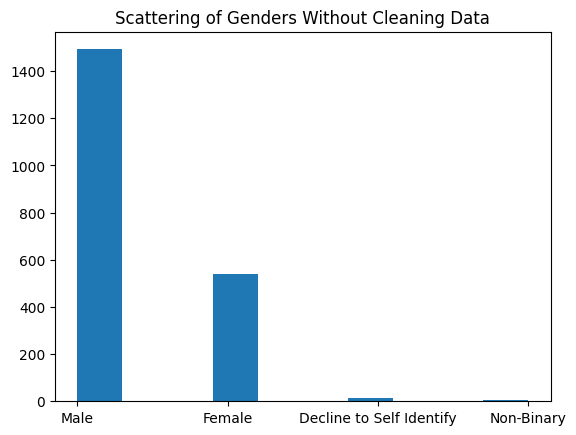

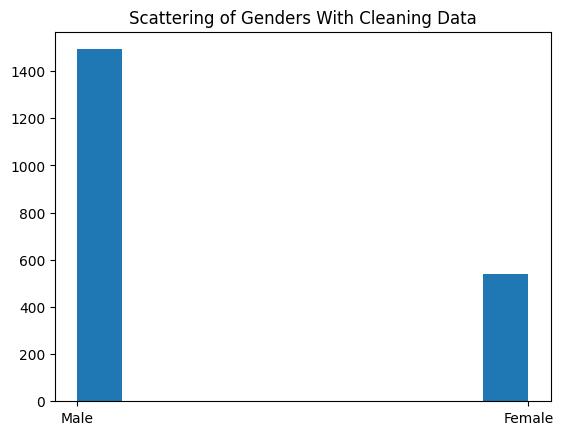

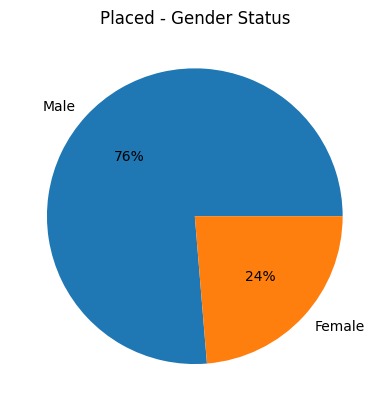

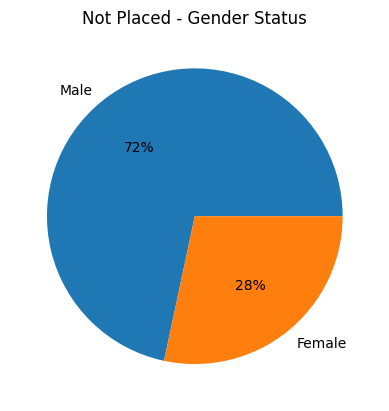

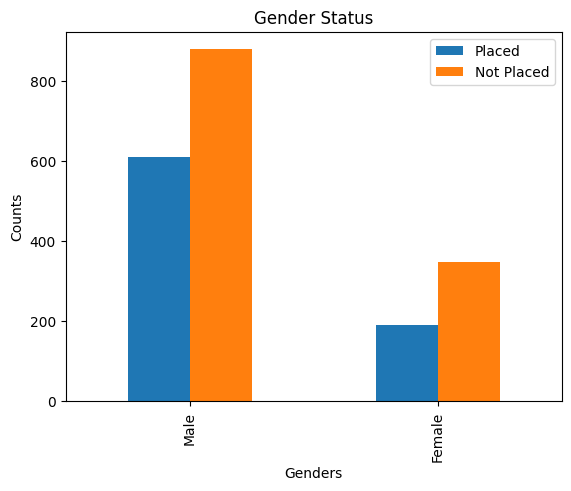

In [4]:
"""
Load data into DataFrame, clean and analyze gender distribution of placed 
and not placed candidates.

Steps:
1. Load data into DataFrame using loadData() function.
2. Prepare Data:
   - Cleaning Data:
     - Drop rows with missing values in 'gender'.
     - Plot histogram to visualize gender distribution without cleaning the data using matplotlib:
       - Title: 'Scattering of Genders Without Cleaning Data'
   - Replace 'Non-Binary' and 'Decline to Self Identify' with NaN in 'gender' column.
     Drop corresponding rows with missing values in 'gender'.
     Plot histogram again to visualize gender distribution after cleaning the data using matplotlib:
       - Title: 'Scattering of Genders With Cleaning Data'
3. End Prepare Data
   - End Cleaning Data

4. Initialize analysis using initAnalysis() function to get targetPlaced, 
   dataPlaced, targetNotPlaced, and dataNotPlaced.
5. Extract 'gender' for placed and not placed candidates.
6. Plot pie charts for gender distribution using matplotlib:
   - For placed candidates: genderPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%').
     Set title to 'Placed - Gender Status'.
   - For not placed candidates: genderNotPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%').
     Set title to 'Not Placed - Gender Status'.
7. Count occurrences of each gender for placed and not placed candidates.
8. Create a combined DataFrame 'combinedDataFrame' showing counts of gender distribution 
   for both placed and not placed candidates.
9. Plot a bar chart using combinedDataFrame.plot(kind='bar') to visualize the counts 
   of gender distribution for both groups using matplotlib:
   - X-axis: 'Genders'
   - Y-axis: 'Counts'
   - Title: 'Gender Status'

Note: Requires matplotlib and pandas libraries to be imported.
"""

# Load data into DataFrame
dataFrame = loadData()

# Prepare Data
# Cleaning Data

# Drop rows with missing values in "gender"
dataFrame = dataFrame.dropna(subset=["gender"])
# Plot histogram to visualize gender distribution without cleaning the data
plt.title('Scattering of Genders Without Cleaning Data')
plt.hist(dataFrame["gender"])
plt.show()

# Replace "Non-Binary" and "Decline to Self Identify" with NaN and drop corresponding rows
dataFrame["gender"] = dataFrame["gender"].replace(["Non-Binary", "Decline to Self Identify"], np.nan)
dataFrame = dataFrame.dropna(subset=["gender"])
# Plot histogram to visualize gender distribution after cleaning the data
plt.title('Scattering of Genders With Cleaning Data')
plt.hist(dataFrame["gender"])
plt.show()

# End Prepare Data
# End Cleaning Data

# Initialize analysis
targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

# Extract gender for placed and not placed groups
genderPlaced = dataPlaced["gender"]
genderNotPlaced = dataNotPlaced["gender"]

# Plot pie chart for gender distribution of placed candidates
genderPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Placed - Gender Status')
plt.show()

# Plot pie chart for gender distribution of not placed candidates
genderNotPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Not Placed - Gender Status')
plt.ylabel('')
plt.show()

# Count occurrences of each gender
genderPlaced = genderPlaced.value_counts()
genderNotPlaced = genderNotPlaced.value_counts()

# Create a combined DataFrame for bar chart visualization
combinedDataFrame = pd.DataFrame({
    'Placed': genderPlaced,
    'Not Placed': genderNotPlaced
})

# Plot bar chart showing counts of gender distribution for both groups
combinedDataFrame.plot(kind='bar')
plt.xlabel('Genders')
plt.ylabel('Counts')
plt.title('Gender Status')
plt.show()
